In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import string

import itertools
import time
from pathlib import Path

In [16]:
def plot_something(ax):
    x = np.linspace(0, 50, 5000)
    ax.plot(x, np.sin(x) * x)
    ax.set_xlabel("$x$")
    ax.set_ylabel(r"$x \sin x$")

# Matplotlib tutorial

28 January 2025

Lisa Koch, adjusted from Rita González Márquez and Nik Böhm

# Goal: figures for publications

You will ultimately want to use your figures in publications. Here is an example paper on [overleaf](https://www.overleaf.com/4365353499pbcswdtkxqxq) where the various versions of the same figure are inserted in a MIDL-style latex article.


### Wrong:

Text(0, 0.5, '$x \\sin x$')

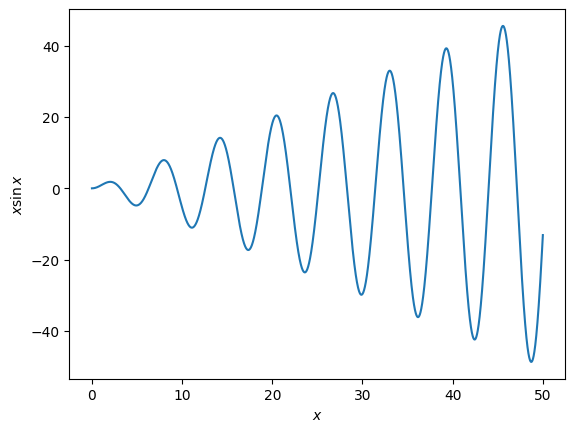

In [17]:
# DON'T DO THIS, use subplots instead

x = np.linspace(0, 50, 5000)
y = np.sin(x) * x

plt.figure()

plt.plot(x, y)
plt.xlabel("$x$")
plt.ylabel(r"$x \sin x$")
# plt.show()

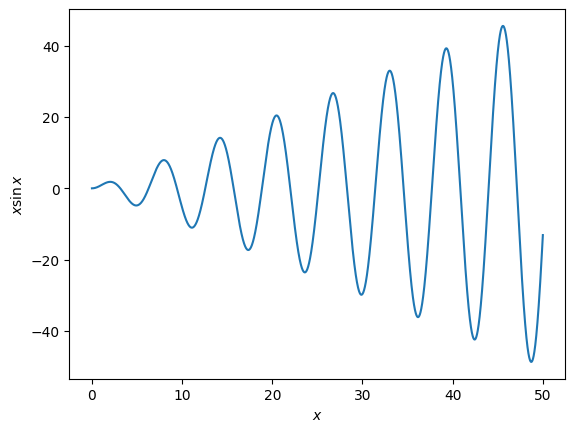

In [12]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel("$x$")
ax.set_ylabel(r"$x \sin x$")

fig.savefig("01a_random_size.pdf")
fig.savefig("01a_random_size.png", dpi=100)
plt.show()

### Less wrong, but not so pretty

We specify the absolute figure sizse (in inches) as it should appear in the latex document.

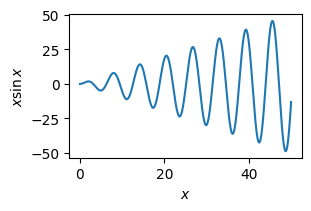

In [18]:
fig, ax = plt.subplots(
    figsize=(3, 2), layout="constrained"
)

ax.plot(x, y)
ax.set_xlabel("$x$")
ax.set_ylabel(r"$x \sin x$")

plt.show()
fig.savefig("01b_correct_size.pdf")

### Ready for publication

We use a style file with pre-configured appropriate font sizes and style choices, and set the desired figure size as above.

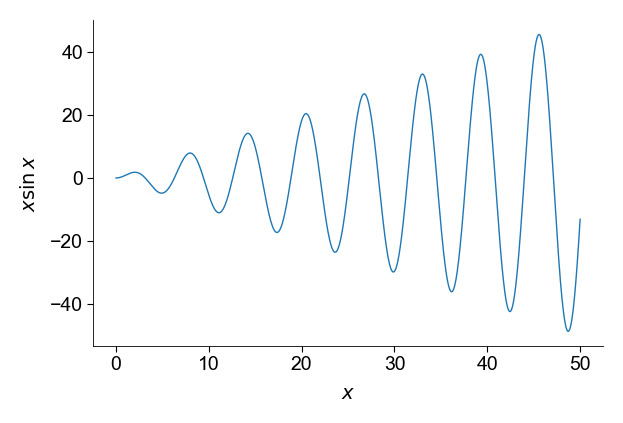

In [19]:
with plt.style.context("./plot_style.txt"):
    fig, ax = plt.subplots(
        figsize=(3, 2),
        layout="constrained",
    )

    ax.plot(x, y)
    ax.set_xlabel("$x$")
    ax.set_ylabel(r"$x \sin x$")

    plt.show()
    fig.savefig("01c_styled.pdf")

# Vocabulary

## Main terms

- figure
- axes
- axis
- spines
- coordinates systems (figure, axes, data)

Coordinates transformation tutorial: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html

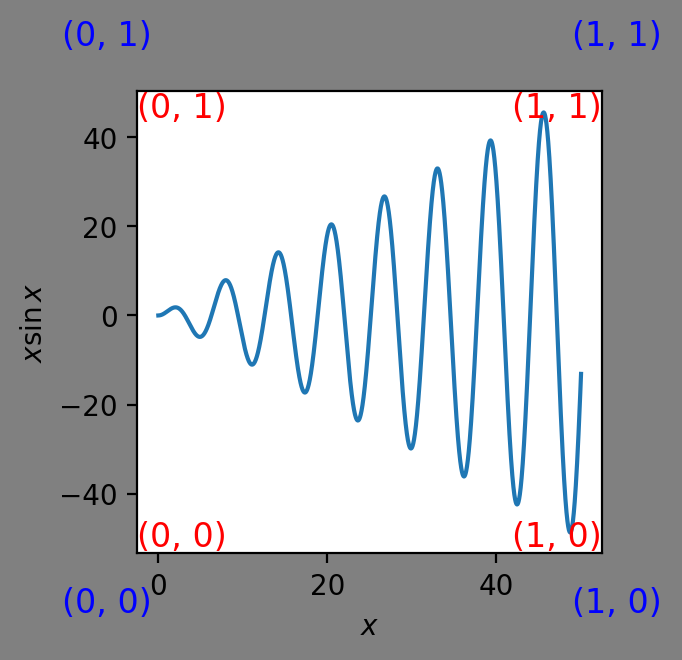

In [20]:
# %matplotlib inline
fig, ax = plt.subplots(
    figsize=(3, 3),
    facecolor="grey",
    dpi=200,
    # layout="constrained",
)

txt_kwargs_ax = dict(color="red", fontsize="larger")
txt_kwargs_fig = dict(color="blue", fontsize="larger")

plot_something(ax)

for coord in itertools.product([0, 1], [0, 1]):
    x, y = coord
    ha = "left" if x == 0 else "right"
    va = "top" if y == 1 else "bottom"
    ax.text(
        x,
        y,
        f"({x}, {y})",
        transform=ax.transAxes,
        ha=ha,
        va=va,
        **txt_kwargs_ax,
    )

    fig.text(
        x,
        y,
        f"({x}, {y})",
        transform=fig.transFigure,
        ha=ha,
        va=va,
        **txt_kwargs_fig,
    )

fig.savefig("coords.pdf")

# Subplots

## `plt.subplots`

[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]


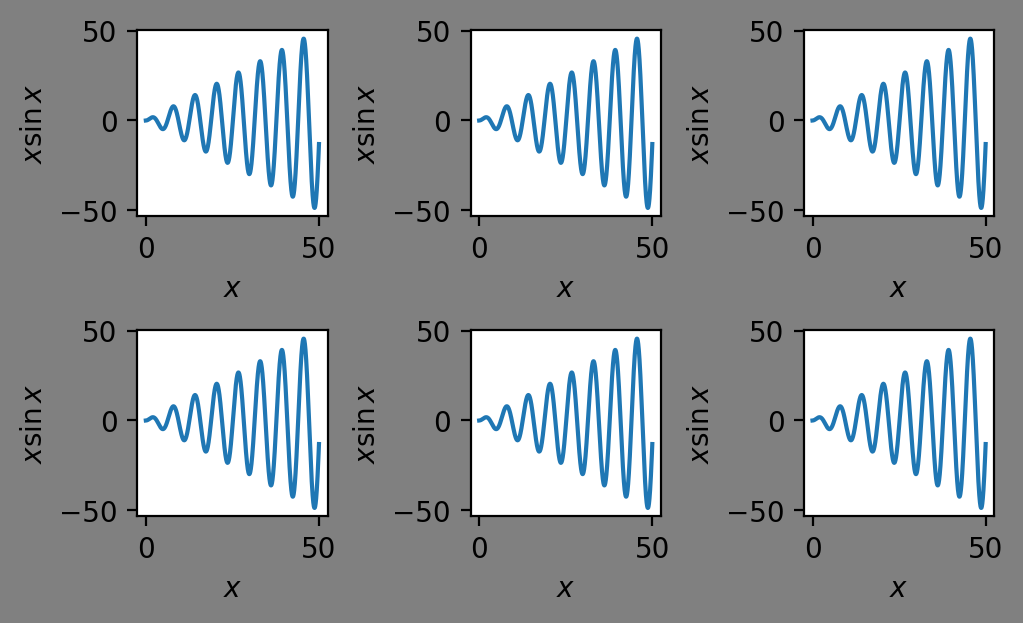

In [ ]:
fig, axs = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(5, 3),
    facecolor="grey",
    dpi=200,
    layout="constrained",
)

print(axs)

txt_kwargs = dict(
    color="black", fontsize="larger"
)

for ax in axs.flat:
    plot_something(ax)

## Whitespaces: `layout='constrained'`

Advantages of constrained layout vs. tight layout:
https://github.com/matplotlib/cheatsheets/issues/30

# Summary

The way of having a final figure ready for a journal/conference submission directly from python is:
1. Do subplots in python and not in an external editor (`plt.subplots`).
    + add subplot letters
2. Set `figsize` (in inches!) to have the required width by the journal/conferences.
    + then the figure will not be rescaled in the manuscript (cause it's the right size)
    + the specified fontsize in python will match the fontsize in LaTeX  
3. Use a style file! Template for style file: https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-style-sheets
    + specify fonts and fontsizes in there
    + despine axis
    + customize linewidths
4. Save as a vector graphic (pdf, not png!)

Advantages of this approach:
- if results change, the figure can be easily redone (by rerunning the script)
- layout is consistent across all figures
- your inner perfectionist (and your supervisor) will be satisfied